In [9]:
from transformers import OneFormerProcessor, OneFormerModel, TrainingArguments, Trainer
from PIL import Image
import requests
import torch

In [2]:
# creare a OneFormer config
# initialize the model with the config
# train the model with a custom dataset -> Train class
# check model predictions

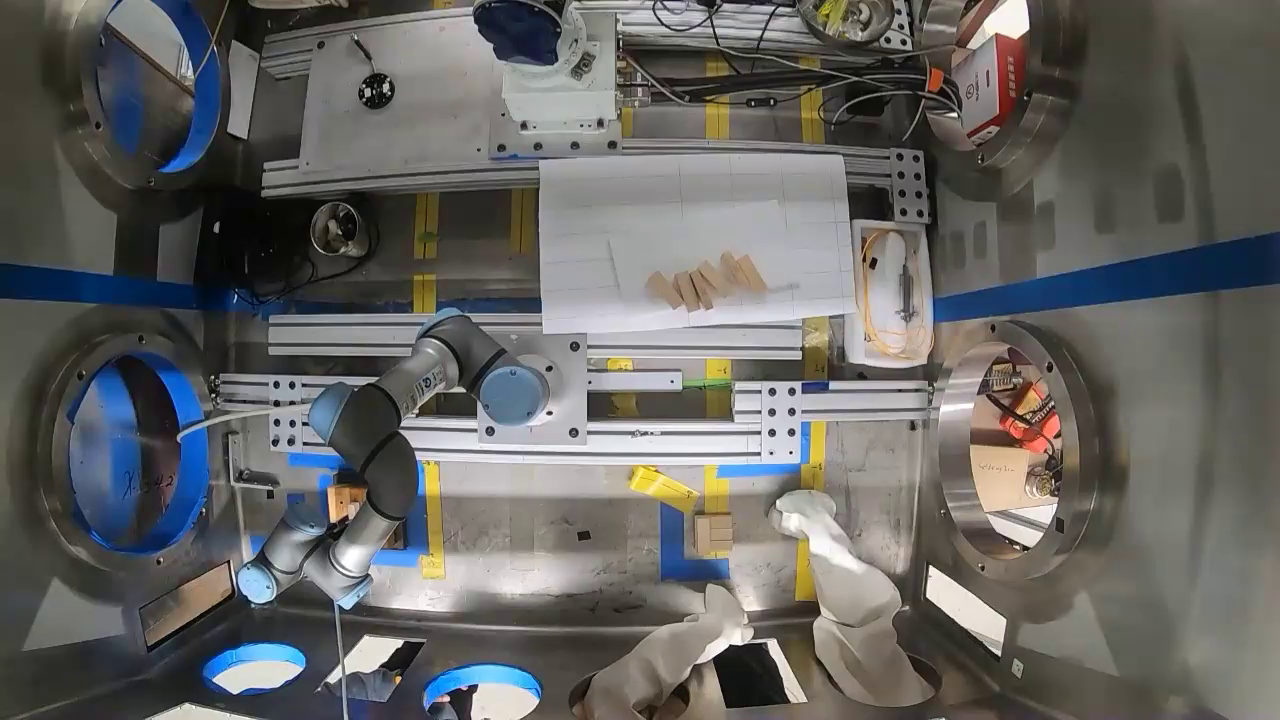

In [10]:
image = Image.open("C:\\Users\\itsjo\\Documents\\repos\\assembly_glovebox_dataset\\data\\images\\Test_Subject_1\\id\\J\\Top_View\\J_GL_7356.0.png")
image

In [11]:
id2label = {
    0: "background",
    1: "left_hand",
    2: "right_hand"
}

In [14]:
model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", id2label=id2label, label2id = {v: k for k, v in id2label.items()},
                                                          num_classes=3, ignore_mismatched_sizes=True, num_queries=3)

Some weights of OneFormerForUniversalSegmentation were not initialized from the model checkpoint at shi-labs/oneformer_ade20k_swin_tiny and are newly initialized because the shapes did not match:
- model.transformer_module.queries_embedder.weight: found shape torch.Size([150, 256]) in the checkpoint and torch.Size([3, 256]) in the model instantiated
- model.transformer_module.decoder.class_embed.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([4, 256]) in the model instantiated
- model.transformer_module.decoder.class_embed.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([4]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
model.config

OneFormerConfig {
  "_commit_hash": "05f2812b1eccf9909b3897777450f8d68148cafc",
  "_name_or_path": "shi-labs/oneformer_ade20k_swin_tiny",
  "architectures": [
    "OneFormerForUniversalSegmentation"
  ],
  "backbone_config": {
    "_name_or_path": "",
    "add_cross_attention": false,
    "architectures": [
      "SwinForImageClassification"
    ],
    "attention_probs_dropout_prob": 0.0,
    "bad_words_ids": null,
    "begin_suppress_tokens": null,
    "bos_token_id": null,
    "chunk_size_feed_forward": 0,
    "cross_attention_hidden_size": null,
    "decoder_start_token_id": null,
    "depths": [
      2,
      2,
      6,
      2
    ],
    "diversity_penalty": 0.0,
    "do_sample": false,
    "drop_path_rate": 0.3,
    "early_stopping": false,
    "embed_dim": 96,
    "encoder_no_repeat_ngram_size": 0,
    "encoder_stride": 32,
    "eos_token_id": null,
    "exponential_decay_length_penalty": null,
    "finetuning_task": null,
    "forced_bos_token_id": null,
    "forced_eos_token

In [ ]:
import numpy as np
image = np.array(image)
image = torch.from_numpy(image)
    
device = "cuda"
inputs = inputs.to(device)
model = model.to(device)

In [26]:
import torch
import torchvision.transforms.functional as TF

# Convert the image to PIL format
image_pil = TF.to_pil_image(image.permute(-1, 0, 1))

# Resize the image
resized_image_pil = TF.resize(image_pil, (161, 161))

# Convert the resized image back to a tensor
resized_image = TF.to_tensor(resized_image_pil)

# Print the size of the resized image tensor
print(resized_image.size())

torch.Size([3, 161, 161])


In [30]:
image = resized_image

In [16]:
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", metadata=id2label, num_labels=3, class_names=["background", "left_hand", "right_hand"], do_reduce_labels=True,
                                                size=644, ignore_mismatched_sizes=True) #ignore mismatched size
# FOR THE SIZE I MULTIPLIED THE SIZE OF THE IMAGE BY 4

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\transformers\models\oneformer\image_processing_oneformer.py:417: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(


In [19]:
device="cuda"

In [25]:
inputs = processor(image, ["semantic"], return_tensors="pt")

inputs = inputs.to(device)

In [23]:
import torch

for k,v in inputs.items():
  if isinstance(v, torch.Tensor):
    print(k,v.shape)
  else:
    print(k,[x.shape for x in v])

pixel_values torch.Size([1, 3, 644, 1144])
pixel_mask torch.Size([1, 644, 1144])
task_inputs torch.Size([1, 77])


In [21]:
with torch.no_grad():
    outputs = model(**inputs)

outputs


KeyboardInterrupt



In [35]:
outputs.transformer_decoder_mask_predictions.shape

torch.Size([1, 3, 161, 161])

In [12]:
import numpy as np
outputs.transformer_decoder_mask_predictions.shape, np.array(image).shape

(torch.Size([1, 3, 128, 228]), (1080, 1920, 3))

(128, 228)


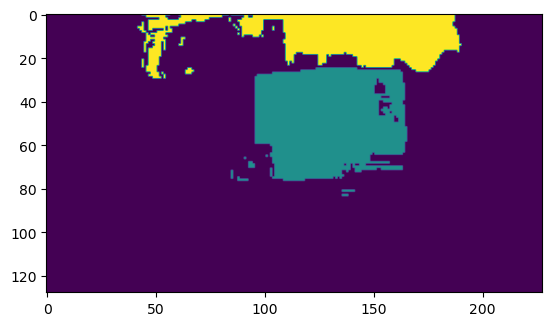

In [17]:
import matplotlib.pyplot as plt

mask_predictions = outputs.transformer_decoder_mask_predictions
# list(mask_predictions.shape)
# outputs.keys()

preds = torch.argmax(mask_predictions, dim=1)

img = preds[0].cpu().numpy()
print(img.shape)
plt.imshow(img)
plt.show()

# Now, Getting Oneformer to Work for Training

In [13]:
from transformers import OneFormerProcessor, OneFormerModel, TrainingArguments, Trainer, OneFormerForUniversalSegmentation
from PIL import Image
import requests
import torch

In [2]:
id2label = {
    0: "background",
    1: "left_hand",
    2: "right_hand"
}

In [3]:
# the following shoudl change the amount of classes outputted by the model
# model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", num_labels=3, id2label=id2label, ignore_mismatched_sizes=True)
model = OneFormerForUniversalSegmentation.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", id2label=id2label, label2id = {v: k for k, v in id2label.items()},
                                                          num_classes=3, ignore_mismatched_sizes=True, num_queries=3)

Some weights of OneFormerForUniversalSegmentation were not initialized from the model checkpoint at shi-labs/oneformer_ade20k_swin_tiny and are newly initialized because the shapes did not match:
- model.transformer_module.queries_embedder.weight: found shape torch.Size([150, 256]) in the checkpoint and torch.Size([3, 256]) in the model instantiated
- model.transformer_module.decoder.class_embed.weight: found shape torch.Size([151, 256]) in the checkpoint and torch.Size([4, 256]) in the model instantiated
- model.transformer_module.decoder.class_embed.bias: found shape torch.Size([151]) in the checkpoint and torch.Size([4]) in the model instantiated
- criterion.empty_weight: found shape torch.Size([151]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
import sys
sys.path.append("..")

In [5]:
## use M and Y to switch cells b/w MD and python
## use ESC to move to command mode and Enter to go into edit mode
import torch
from torch.utils.data import Dataset, DataLoader
import sys
import os
# sys.path.append("..")
# print(os.getcwd())
# from dataloader import AssemblyDataset
from dataloaders.dataloader import AssemblyDataset

dataset = AssemblyDataset(

    path_to_labels=['C:\\Users\\itsjo\\Documents\\repos\\assembly_glovebox_dataset\\data\\Labels\\Test_Subject_1\\id\\J\\Top_View'], 
    path_to_images=['C:\\Users\\itsjo\\Documents\\repos\\assembly_glovebox_dataset\\data\\images\\Test_Subject_1\\id\\J\\Top_View'] 
                       )

dataloader = DataLoader(dataset=dataset, batch_size=1, shuffle=True)


In [6]:
import evaluate

metric = evaluate.load("mean_iou")

def compute_metrics(eval_pred):
    with torch.no_grad():
        logits, labels = eval_pred
        logits_tensor = torch.from_numpy(logits)
        logits_tensor = torch.argmax(logits_tensor, dim=1)

        pred_labels = logits_tensor.detach().cpu().numpy()

        metrics = metric.compute(
            predictions = pred_labels,
            references = labels
        )

        return metrics

In [7]:
from transformers import OneFormerConfig, OneFormerImageProcessor

In [8]:
num_epochs = 10
num_training_steps = num_epochs * dataset.__len__()

In [9]:
from tqdm import tqdm
import torch.nn as nn
from transformers import AdamW

optimizer = AdamW(model.parameters(), lr=3e-5)

device = "cuda"

model = model.to(device)

loss_fn = nn.CrossEntropyLoss()

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [10]:
segmentation_maps = torch.randint(0, 2, (128, 228), dtype=torch.long)

In [11]:
segmentation_maps.shape

torch.Size([128, 228])

In [61]:
from transformers import OneFormerImageProcessor, OneFormerConfig
## creating an image processor
processor = OneFormerProcessor.from_pretrained("shi-labs/oneformer_ade20k_swin_tiny", metadata=id2label, num_labels=3, class_names=["background", "left_hand", "right_hand"], do_reduce_labels=True,
                                                size=644, ignore_mismatched_sizes=True) # addded ignore mismatched size

# GOT SIZE BY MULTIPLYING BY 4

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\transformers\models\oneformer\image_processing_oneformer.py:417: FutureWarning: The `reduce_labels` argument is deprecated and will be removed in v4.27. Please use `do_reduce_labels` instead.
  warnings.warn(


In [37]:

model.train()

for epoch in range(num_epochs):
    for index, batch in tqdm(enumerate(dataloader)):
        print(f"the index is {index}")
        x, y = batch
        print(f"x is {x.shape}")

        inputs = processor(x, ["semantic"],  return_tensors="pt")
        inputs = inputs.to(device)
        y = y.to(device)

        # this expects masks to have shape [batch, h, w], rn its just [h, w]
        # outputs = model(**inputs, class_labels=torch.tensor([0, 1, 2]), mask_labels=y[0])
        outputs = model(**inputs)


        # CHECK OUT USING CLASS_LABELS AND MASK_LABELS TO SPECIFY OUTPUT IN THE HUGGINGFACE DOCUMENTATION
        # use this blog = https://huggingface.co/blog/mask2former
        # use this colab notebook - https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/MaskFormer/Fine-tuning/Fine_tuning_MaskFormerForInstanceSegmentation_on_semantic_sidewalk.ipynb#scrollTo=tXCWTfTbz5Wu
        # ^ see how they computed loss straight from the output and applied

        # here is how they developed the tokenizer - https://github.com/huggingface/transformers/blob/v4.30.0/src/transformers/models/oneformer/convert_to_hf_oneformer.py#L225
        
        target_size = [(y.shape[1], y.shape[2])] * y.shape[0]

        
        loss_fn = nn.CrossEntropyLoss()
        y = y.to(device)

        print(f"ouputs is {outputs.transformer_decoder_mask_predictions.device}")
        print(f"y is {y.long().device}")

        loss = loss_fn(outputs.transformer_decoder_mask_predictions, y.long())
        
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()
        

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:3                                                                                    │
│                                                                                                  │
│    1 model.train()                                                                               │
│    2                                                                                             │
│ ❱  3 for epoch in range(num_epochs):                                                             │
│    4 │   for index, batch in tqdm(enumerate(dataloader)):                                        │
│    5 │   │   print(f"the index is {index}")                                                      │
│    6 │   │   x, y = batch                                                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'num_epochs' is not defined

In [42]:
with torch.no_grad():
    torch.cuda.empty_cache()

In [14]:
y.shape

torch.Size([1, 128, 228])

In [15]:
outputs.masks_queries_logits.shape

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 outputs.masks_queries_logits.shape                                                           │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'outputs' is not defined

In [16]:
prediction_size = [(y.shape[1], y.shape[2])] * y.shape[0]

In [17]:
outputs.masks_queries_logits.shape

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 outputs.masks_queries_logits.shape                                                           │
│   2                                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'outputs' is not defined

# Inference

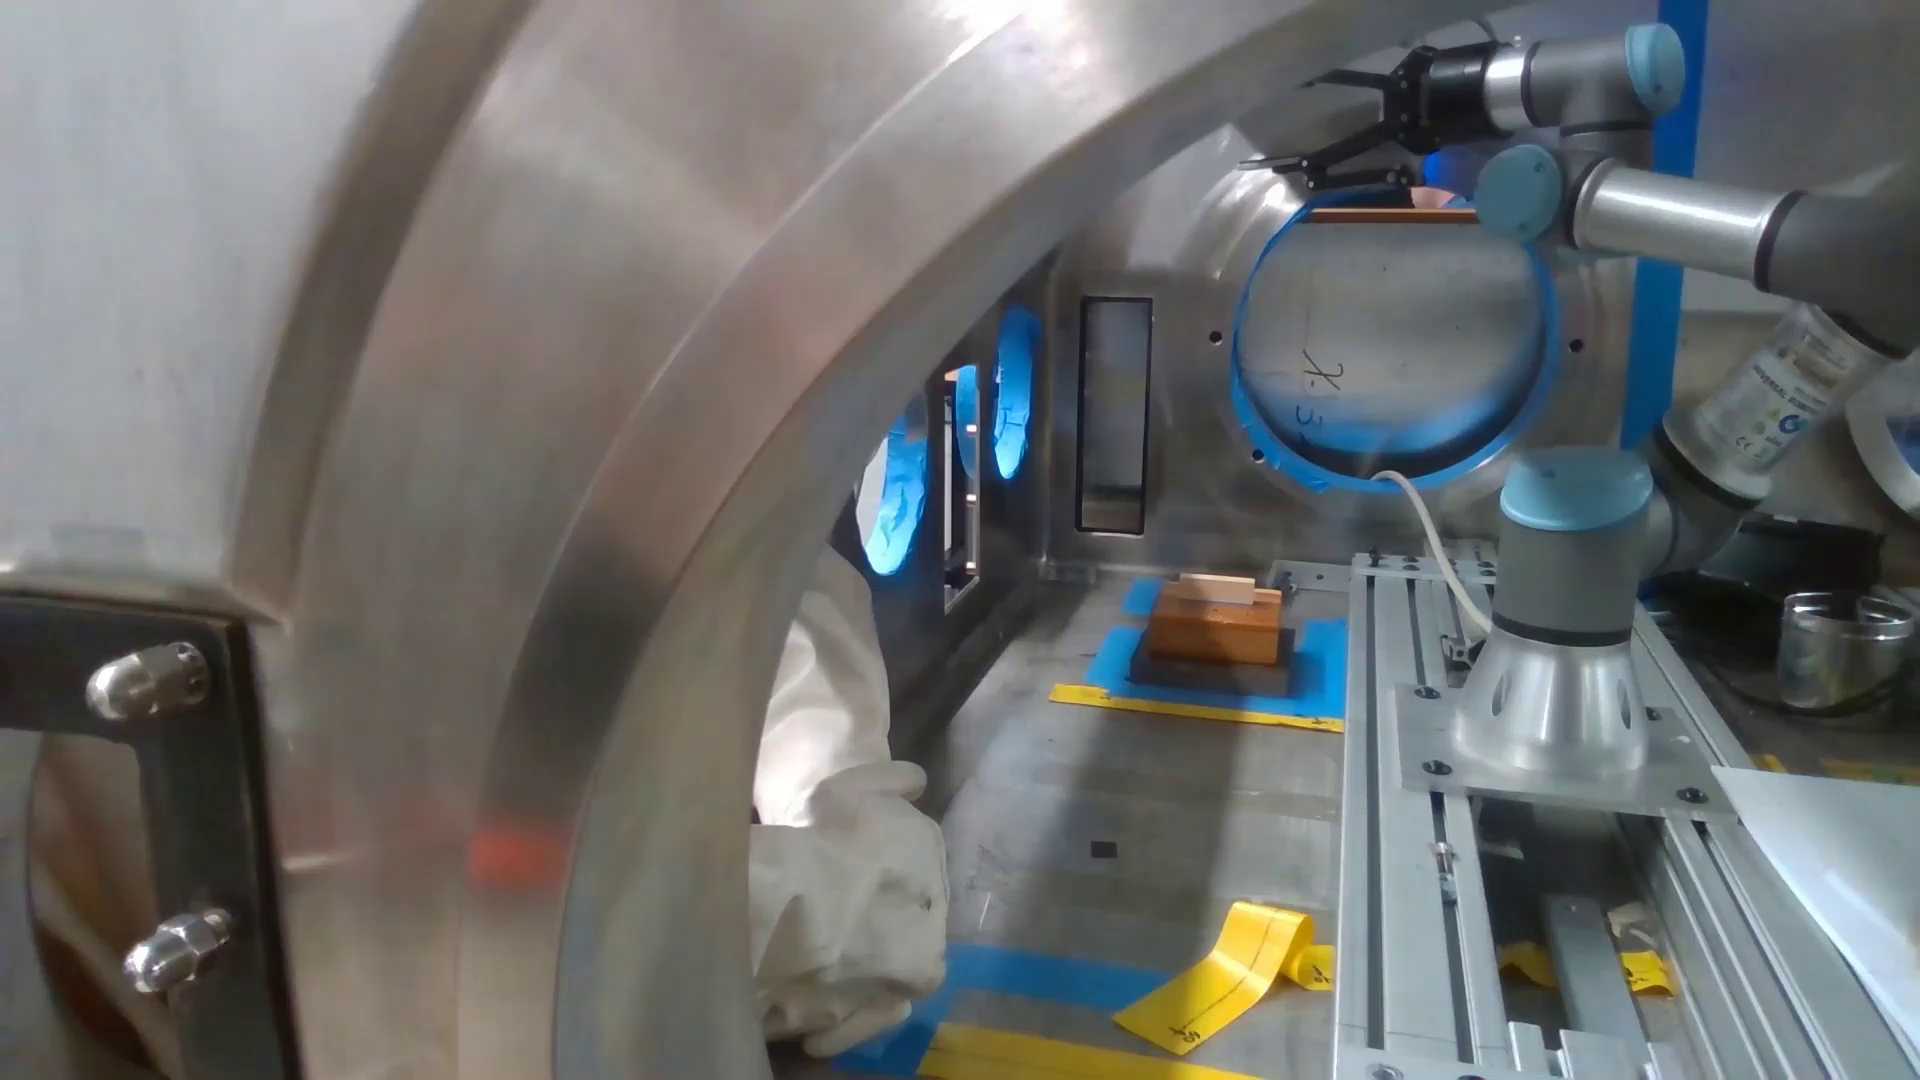

In [27]:
image = Image.open("J_GL_0.0.png")
image

In [28]:
semantic_inputs = processor(images=image, task_inputs=["semantic"], return_tensors="pt")
for k,v in semantic_inputs.items():
  print(k,v.shape)

pixel_values torch.Size([1, 3, 644, 1144])
pixel_mask torch.Size([1, 644, 1144])
task_inputs torch.Size([1, 77])


In [30]:
# forward pass
model.eval()

model.to(device="cuda")
semantic_inputs.to(device)
with torch.no_grad():
  outputs = model(**semantic_inputs)

c:\Users\itsjo\anaconda3\envs\test_env\Lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [46]:
model.config.contrastive_temperature

0.07

In [54]:
ground.dtype

torch.int64

In [86]:
outputs.transformer_decoder_mask_predictions.shape

torch.Size([1, 3, 161, 286])

In [96]:
print(raw_preds.text_queries)

None


In [107]:
loss = torch.nn.CrossEntropyLoss()
loss(outputs.transformer_decoder_mask_predictions, target.to(device="cuda"))

tensor(8.3286, device='cuda:0')

## Computing the Loss

In [111]:
# target = torch.randint(size=(1, 161, 286), high=2)
target = torch.argmax(outputs.transformer_decoder_mask_predictions, dim=1)
raw_preds = outputs
ground = torch.nn.functional.one_hot(target.long(), num_classes=3)
ground_truth = ground.permute(0,-1, 1, 2).to(device)

In [112]:
loss_dict = model.get_loss_dict(
    masks_queries_logits=raw_preds.masks_queries_logits,
    class_queries_logits=raw_preds.class_queries_logits,
    contrastive_queries_logits=raw_preds.transformer_decoder_contrastive_queries,
    mask_labels = [ground_truth[i].to(torch.float32) for i in range(target.shape[0])],
    class_labels=[torch.tensor([0, 1, 2]).to(device) for i in range(ground.shape[0])],
    text_queries = raw_preds.text_queries,
    auxiliary_predictions= raw_preds.transformer_decoder_auxiliary_predictions,
    calculate_contrastive_loss= False
)

In [113]:
loss_dict

{'loss_mask': tensor([4.5682], device='cuda:0'),
 'loss_dice': tensor([1.8832], device='cuda:0'),
 'loss_cross_entropy': tensor(2.0089, device='cuda:0'),
 'loss_mask_0': tensor([4.9732], device='cuda:0'),
 'loss_dice_0': tensor([3.7680], device='cuda:0'),
 'loss_cross_entropy_0': tensor(3.4528, device='cuda:0'),
 'loss_mask_1': tensor([8.3193], device='cuda:0'),
 'loss_dice_1': tensor([3.0634], device='cuda:0'),
 'loss_cross_entropy_1': tensor(3.0553, device='cuda:0'),
 'loss_mask_2': tensor([6.9662], device='cuda:0'),
 'loss_dice_2': tensor([2.6309], device='cuda:0'),
 'loss_cross_entropy_2': tensor(3.0928, device='cuda:0'),
 'loss_mask_3': tensor([6.4107], device='cuda:0'),
 'loss_dice_3': tensor([2.4681], device='cuda:0'),
 'loss_cross_entropy_3': tensor(3.0285, device='cuda:0'),
 'loss_mask_4': tensor([5.9065], device='cuda:0'),
 'loss_dice_4': tensor([2.6128], device='cuda:0'),
 'loss_cross_entropy_4': tensor(2.5189, device='cuda:0'),
 'loss_mask_5': tensor([4.6212], device='cuda:

In [114]:
loss = model.get_loss(loss_dict)
loss

tensor([104.7287], device='cuda:0')

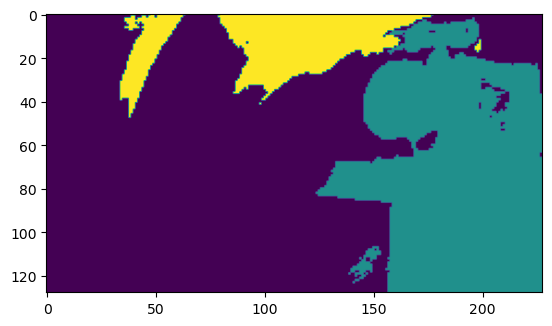

In [79]:
torch.unique(outputs.transformer_decoder_mask_predictions)
a = torch.argmax(outputs.transformer_decoder_mask_predictions, dim=1)

plt.imshow(a[0].cpu())

In [23]:
"""code if you are using the raw outputs from the model instead, and not doing post processing"""
# import matplotlib.pyplot as plt

# mask_predictions = outputs.transformer_decoder_mask_predictions
# # list(mask_predictions.shape)
# # outputs.keys()

# preds = torch.argmax(mask_predictions, dim=1)

# img = preds[0].cpu().numpy()
# print(img.shape)
# plt.imshow(img)
# plt.show()

'code if you are using the raw outputs from the model instead, and not doing post processing'

## Calculating Loss

In [7]:
pred = torch.rand(1, 3, 161, 161)
correct = torch.randint(size=(1, 161, 161), dtype=torch.int64, high=2)

In [ ]:
loss = OneFormerForUniversalSegmentation.get_loss_dict(
    masks_queries_logits = pred,
    class_queries_logits = 
)

In [26]:
5%3

2